### Lab10:Advanced Data Wrangling in Pandas

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
Data=pd.read_csv('excelample.csv')

In [6]:
Data

,Unnamed: 0,MONTH,CATEGORY,AMOUNT
0,0,January,Transportation,74
1,1,January,Grocery,235
2,2,January,Household,175
3,3,January,Entertainment,100
4,4,February,Transportation,115
5,5,February,Grocery,240
6,6,February,Household,225
7,7,February,Entertainment,125
8,8,March,Transportation,90
9,9,March,Grocery,260


In [8]:
Data_pivot=Data.pivot(index="CATEGORY",columns="MONTH",values="AMOUNT")
Data_pivot

MONTH,February,January,March
CATEGORY,,,
Entertainment,125,100,120
Grocery,240,235,260
Household,225,175,200
Transportation,115,74,90


In [9]:
Data_pivot.sum(axis=1)

CATEGORY
Entertainment     345
Grocery           735
Household         600
Transportation    279
dtype: int64

In [10]:
Data_pivot.sum(axis=0)

MONTH
February    705
January     584
March       670
dtype: int64

In [11]:
df=pd.DataFrame({'Fare':[7.25,71.2833,51.8625,30.0708,7.8542,13.0],
                 'Pclass':[3,1,1,2,3,2],
                 'Sex':['male','Female','Male','Female','Female','Male'],
                 'Survived':[0,1,0,1,0,1]})

In [12]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,Female,1
2,51.8625,1,Male,0
3,30.0708,2,Female,1
4,7.8542,3,Female,0
5,13.0000,2,Male,1


In [14]:
df.pivot(index='Pclass',columns='Sex',values='Fare')

Sex,Female,Male,male
Pclass,,,
1,71.2833,51.8625,NaN
2,30.0708,13.0000,NaN
3,7.8542,NaN,7.25


In [15]:
df.pivot(index='Pclass',columns='Sex',values='Survived')

Sex,Female,Male,male
Pclass,,,
1,1.0,0.0,NaN
2,1.0,1.0,NaN
3,0.0,NaN,0.0


In [16]:
df=sns.load_dataset('titanic')

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
try:
    df.pivot(index='sex',columns='Pclass',values='fare')
except Exception as e:
    print("Exception!",e)

Exception! 'Pclass'


In [21]:
df.loc[[1,3],["sex",'pclass','fare']]

,sex,pclass,fare
1,female,1,71.2833
3,female,1,53.1000


In [22]:
df.pivot_table(index='sex',columns='pclass',values='fare')

pclass,1,2,3
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [24]:
df.pivot_table(index='sex',columns='pclass',values='fare',aggfunc='max')

pclass,1,2,3
sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [30]:
df.pivot_table(index='sex',columns='pclass',values='fare',aggfunc='count')

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


In [31]:
pd.crosstab(index=df['sex'],columns=df['pclass'])

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


In [35]:
df.pivot_table(index='sex',columns='pclass',values='survived',aggfunc='mean')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Text(0, 0.5, 'survived ratio')

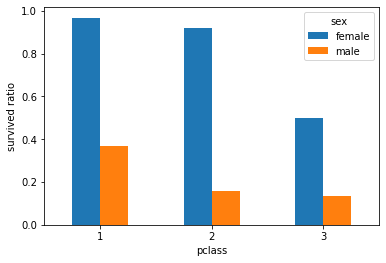

In [36]:
fig,ax1=plt.subplots()
df.pivot_table(index='pclass',columns='sex',values='survived',aggfunc='mean').plot(kind='bar',rot=0,ax=ax1)
ax1.set_ylabel('survived ratio')

In [41]:
median_age_table=df.pivot_table(index='age',columns='sex',values='fare',aggfunc='median')
median_age_table[:5]

sex,female,male
age,,
0.42,NaN,8.5167
0.67,NaN,14.5000
0.75,19.25830,NaN
0.83,NaN,23.8750
0.92,NaN,151.5500
1.00,13.43750,39.0000
2.00,26.95000,27.5625
3.00,31.32710,22.3750
4.00,22.02500,29.1250


In [43]:
df['underaged']=df['age']<=18

In [45]:
df.pivot_table(index='underaged',columns='sex',values='fare',aggfunc='median')

sex,female,male
underaged,,
False,24.1500,10.3354
True,20.2875,20.2500


In [46]:
age=pd.cut(df['age'],[0,18,80])
df.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [47]:
fare=pd.qcut(df['fare'],2)
df.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [56]:
df.pivot_table(index='sex',columns='class',aggfunc={'survived':'sum','fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [57]:
pivoted=df.pivot_table(index='sex',columns='pclass',values='fare').reset_index()

In [58]:
pivoted.columns.name=None

In [59]:
pivoted

,sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


In [60]:
pd.melt(pivoted)

,variable,value
0,sex,female
1,sex,male
2,1,106.125798
3,1,67.226127
4,2,21.970121
5,2,19.741782
6,3,16.11881
7,3,12.661633


In [61]:
pd.melt(pivoted,id_vars=['sex'])

,sex,variable,value
0,female,1,106.125798
1,male,1,67.226127
2,female,2,21.970121
3,male,2,19.741782
4,female,3,16.118810
5,male,3,12.661633


In [62]:
df2=pd.DataFrame({'A':['one','one','two','two'],
                  'B':['a','b','a','b'],
                'C':range(4)})

In [63]:
df2

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [64]:
df2=df2.set_index(['A','B'])
df2

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [65]:
result=df2['C'].unstack()

In [66]:
result

B,a,b
A,,
one,0,1
two,2,3


In [67]:
df2=result.stack().reset_index(name='C')

In [68]:
df2

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [69]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,underaged
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [70]:
df.pivot_table(index='pclass',columns='sex',values='survived',aggfunc='mean')

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [82]:
df.groupby(['pclass', 'sex'])['survived'].mean().unstack('sex')

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447
